In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

from DUDL_regular import *

/tmp/ipykernel_7498/2885954984.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# create data

nPerClust = 75

th = np.linspace(0,4*np.pi,nPerClust)
r1 = 10
r2 = 15

# generate data
a = [ r1*np.cos(th) + np.random.randn(nPerClust)*30 ,
      r1*np.sin(th) + np.random.randn(nPerClust) ]
b = [ r2*np.cos(th) + np.random.randn(nPerClust) ,
      r2*np.sin(th) + np.random.randn(nPerClust)*30 ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

In [3]:
# data = torch.tensor([[ 11.1745,  -0.7575],
#         [ 10.8855,   0.5905],
#         [ 14.0291,   3.6705],
#         [  6.0360,   4.6898],
#         [  4.5944,   5.1144],
#         [  7.8443,   6.9192],
#         [  5.0955,   7.2799],
#         [  5.3701,   8.3053],
#         [  0.2043,   8.1767],
#         [  0.8562,  10.3098],
#         [ -1.9282,   8.7074],
#         [  0.3261,  10.5252],
#         [ -2.5698,   9.3051],
#         [ -4.9239,   7.6312],
#         [ -8.4414,   8.1252],
#         [-11.0656,   4.9746],
#         [ -8.9211,   2.8936],
#         [-10.2819,   1.5132],
#         [ -6.3003,   1.5266],
#         [-11.3884,  -2.0333],
#         [-10.0559,  -1.1263],
#         [-13.0725,  -5.6164],
#         [ -5.8363,  -4.4672],
#         [-10.4891,  -6.4183],
#         [ -4.4971,  -9.3345],
#         [ -1.0931,  -9.6842],
#         [ -5.9901,  -9.4616],
#         [ -1.2792,  -8.7500],
#         [  2.9465,  -9.8053],
#         [  2.9223,  -9.3839],
#         [ -0.6177, -10.9981],
#         [  3.0610,  -9.3358],
#         [  8.5391,  -5.9038],
#         [  4.3837,  -8.8770],
#         [  8.9997,  -4.2417],
#         [ 10.0158,  -4.0853],
#         [ 15.6036,  -2.7023],
#         [  9.7620,  -0.6120],
#         [ 10.6487,   2.2721],
#         [ 15.0227,   4.2984],
#         [ 11.3166,   3.7322],
#         [  9.0465,   7.2124],
#         [  6.9509,   6.3947],
#         [  5.3301,   8.3341],
#         [ 11.7233,   9.7483],
#         [  0.8692,  10.4135],
#         [ -4.4908,   8.4634],
#         [  0.8742,   8.5935],
#         [ -0.0972,   9.3637],
#         [ -6.0272,   8.9792],
#         [ -9.5013,   7.3670],
#         [ -6.5675,   6.5568],
#         [ -7.2669,   8.3356],
#         [-14.7269,   5.0110],
#         [-16.2133,   2.6981],
#         [-11.4029,   1.1808],
#         [-12.0175,  -0.6749],
#         [-13.2974,  -3.5104],
#         [ -7.3422,  -4.7044],
#         [ -9.0752,  -7.2729],
#         [ -9.0982,  -6.9676],
#         [ -6.8342,  -8.2212],
#         [-12.0863,  -8.8840],
#         [ -4.0528, -10.3690],
#         [ -3.8563,  -8.5539],
#         [  3.2572, -10.1673],
#         [  5.1797,  -8.8408],
#         [  8.7358,  -9.2288],
#         [  9.5288,  -8.2205],
#         [  6.6184,  -7.2083],
#         [  7.8745,  -6.8299],
#         [  9.9514,  -5.6749],
#         [ 14.0859,  -3.6894],
#         [  7.6956,  -2.0067],
#         [ 12.7195,  -0.9337],
#         [ 14.5912,   1.3620],
#         [ 14.9242,   0.6989],
#         [ 14.1899,   3.5316],
#         [ 14.2655,   9.5061],
#         [ 11.0034,   5.6290],
#         [  9.7494,   7.4959],
#         [  7.3906,  12.0574],
#         [  6.1175,   8.0846],
#         [  2.4529,   8.7349],
#         [ -0.0307,  16.8582],
#         [ -1.5713,  11.4114],
#         [ -4.3420,  17.9403],
#         [ -7.0994,  11.6657],
#         [ -9.3963,  12.1551],
#         [-12.4073,   9.4546],
#         [-12.8160,   8.3517],
#         [-14.5755,   4.1195],
#         [-14.6093,   3.8713],
#         [-15.4739,   3.2609],
#         [-15.1343,   3.1378],
#         [-14.2174,  -5.3862],
#         [-13.8409,  -7.8603],
#         [-10.9739,  -9.9750],
#         [ -9.8221,  -9.0230],
#         [ -9.8428, -17.3267],
#         [ -5.3032,  -5.7756],
#         [ -4.3198, -11.6750],
#         [ -0.6345, -16.6027],
#         [ -1.0029, -15.5015],
#         [  2.1918, -10.2599],
#         [  5.7013, -15.3570],
#         [  8.3262, -12.7973],
#         [  9.9731, -14.4509],
#         [ 13.3410, -13.4161],
#         [ 14.9943,  -8.0316],
#         [ 16.0840,  -8.0526],
#         [ 16.0693,  -5.1789],
#         [ 14.9186,  -3.0371],
#         [ 16.1463,   1.8202],
#         [ 14.2133,  -0.7634],
#         [ 12.8928,   6.9334],
#         [ 12.1428,   9.0381],
#         [ 12.1639,  11.0671],
#         [  8.4432,  10.2345],
#         [  5.7845,  12.5902],
#         [  2.0547,  13.6573],
#         [  0.3876,  15.2586],
#         [ -2.9143,  14.8805],
#         [ -4.5596,  15.1126],
#         [ -7.0611,   8.2939],
#         [ -9.2793,   9.3332],
#         [-10.1401,   7.7021],
#         [-12.7312,  11.8872],
#         [-14.1777,   4.1266],
#         [-15.1304,   2.5297],
#         [-15.0303,  -6.2712],
#         [-14.9116,   0.6158],
#         [-14.4612,  -0.6301],
#         [-14.1931,  -3.9518],
#         [-13.6133,  -3.8045],
#         [-11.4376,  -9.9286],
#         [ -8.0158, -12.7571],
#         [ -6.9400,  -9.3470],
#         [ -5.8885,  -9.3930],
#         [  0.0317, -11.7830],
#         [ -0.1039, -16.9789],
#         [  2.9713, -17.0817],
#         [  5.2838, -12.7572],
#         [  7.6798, -16.5822],
#         [  9.4665,  -8.6450],
#         [ 12.7012, -10.8247],
#         [ 13.9465,  -7.5269],
#         [ 16.0433,  -1.9861],
#         [ 14.4883,  -2.5504],
#         [ 15.0002,   1.4554]])
# configs["data"] = data
# configs["labels"] = labels

In [4]:
# printConfigs(condition=validArgs, **configs)

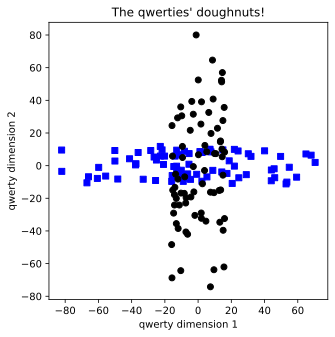

In [5]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [37]:
aT = np.vstack(a).T

In [32]:
from sklearn.preprocessing import minmax_scale, scale

dataZTransformedStd = scale(data_np)
dataZTransformedMinmax = minmax_scale(data_np)

In [38]:
aTStd = scale(aT)
aTMinmax = minmax_scale(aT)

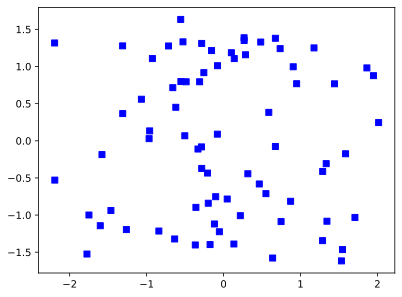

In [40]:
plt.plot(aTStd[:,0],aTStd[:,1],'bs')
plt.show()

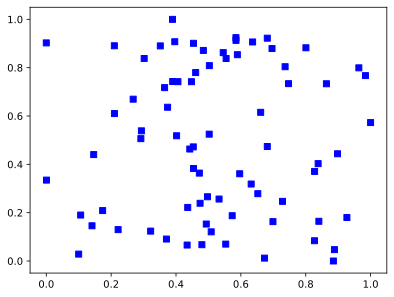

In [41]:
plt.plot(aTMinmax[:,0],aTMinmax[:,1],'bs')
plt.show()

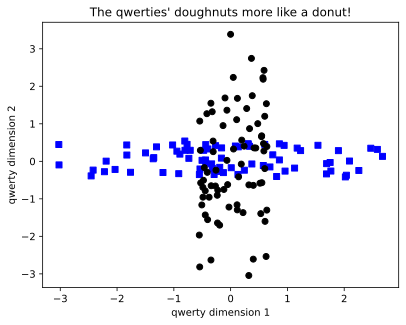

In [33]:
plt.plot(dataZTransformedStd[np.where(labels==0)[0],0],dataZTransformedStd[np.where(labels==0)[0],1],'bs')
plt.plot(dataZTransformedStd[np.where(labels==1)[0],0],dataZTransformedStd[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts more like a donut!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

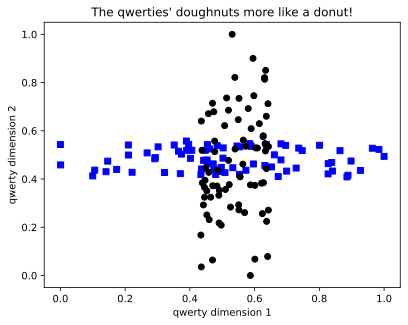

In [24]:
plt.plot(dataZTransformedMinmax[np.where(labels==0)[0],0],dataZTransformedMinmax[np.where(labels==0)[0],1],'bs')
plt.plot(dataZTransformedMinmax[np.where(labels==1)[0],0],dataZTransformedMinmax[np.where(labels==1)[0],1],'ko')
plt.title("The qwerties' doughnuts more like a donut!")
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [17]:
data.std(axis=0)

tensor([26.8605, 24.0718])

In [ ]:
trainaccs, testaccs, trainlosses,testlosses, listOfConfigs = iterConfigsWithNumepochs(**configs)

In [ ]:
listOfConfigs[12],listOfConfigs[13],listOfConfigs[14],listOfConfigs[15]

In [ ]:
trainaccsSmoothened = meanFilter2d(trainaccs, k=0)
testaccsSmoothened = meanFilter2d(testaccs, k=0)
plot2d(trainaccsSmoothened, testaccsSmoothened,torch.arange(len(listOfConfigs)))

In [ ]:
def getmax(accs):
    amax = int(accs.argmax())
    x = amax % accs.shape[1]
    y = amax // accs.shape[1]
    return y, x

In [ ]:
getmax(testaccs)

In [ ]:
testaccs[39,85]

In [ ]:
plot(meanFilter(trainaccs[39]), meanFilter(testaccs[39]))

In [ ]:
plot(meanFilter(trainaccs[36]), meanFilter(testaccs[36]))

In [ ]:
plot(meanFilter(trainaccs[37]), meanFilter(testaccs[37]))

In [ ]:
plot(meanFilter(trainaccs[38]), meanFilter(testaccs[38]))